In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
df = pd.read_csv('dataset\Pluvial_Flood_Dataset.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144401 entries, 0 to 144400
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   X           144401 non-null  float64
 1   Y           144401 non-null  float64
 2   Slope       144119 non-null  float64
 3   Curvature   144401 non-null  float64
 4   Aspect      144401 non-null  float64
 5   TWI         144401 non-null  float64
 6   FA          144401 non-null  float64
 7   Drainage    144401 non-null  float64
 8   Rainfall    144401 non-null  float64
 9   SUSCEP      144401 non-null  object 
dtypes: float64(9), object(1)
memory usage: 11.0+ MB


In [17]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize the ordinal encoder
encoder = OrdinalEncoder()

# Fit and transform the 'SUSCEP' column
df['SUSCEP_encoded'] = encoder.fit_transform(df[['SUSCEP']])

# Display the first few rows of the dataframe
df.head()

,X,Y,Slope,Curvature,Aspect,TWI,FA,Drainage,Rainfall,SUSCEP,SUSCEP_encoded
0,3.909444,7.443056,46.686142,-3.888000e+09,45.000000,-3.250368,147.0,228.8528,101.515616,Very_High,4.0
1,3.908611,7.442778,52.151768,1.296000e+09,60.945396,-4.313832,61.0,229.6781,80.409863,Very_High,4.0
2,3.908889,7.442778,66.484085,0.000000e+00,67.619865,-8.327622,1.0,230.5920,78.986849,Very_High,4.0
3,3.909167,7.442778,58.007183,-2.592000e+09,38.659809,-4.707937,51.0,235.4210,81.953151,Very_High,4.0
4,3.909444,7.442778,60.503792,-1.296000e+09,351.869904,-5.985817,15.0,234.4346,85.866027,Very_High,4.0


In [18]:
import joblib 
joblib.dump(encoder, 'ordinal_encoder.pkl')

['ordinal_encoder.pkl']

In [19]:
encoder.inverse_transform([[0]])

array([['High']], dtype=object)

In [20]:
df = df.drop(['SUSCEP'], axis=1)

In [21]:
from sklearn.model_selection import train_test_split
X,Y = df.drop(['SUSCEP_encoded'], axis=1), df['SUSCEP_encoded']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
X_train.shape, X_test.shape

((115520, 9), (28881, 9))

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier with chosen parameters
rf = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5, random_state=42)

# Fit the model
rf.fit(X_train, Y_train)

# Print the model
print("RandomForest Model:", rf)

# Print the accuracy of the model
print("RandomForest Accuracy:", rf.score(X_test, Y_test))


RandomForest Model: RandomForestClassifier(max_depth=20, min_samples_split=5, random_state=42)
RandomForest Accuracy: 1.0


In [27]:
import joblib

# Save the model to a file
joblib.dump(rf, 'router/random_forest_model.pkl')

['router/random_forest_model.pkl']

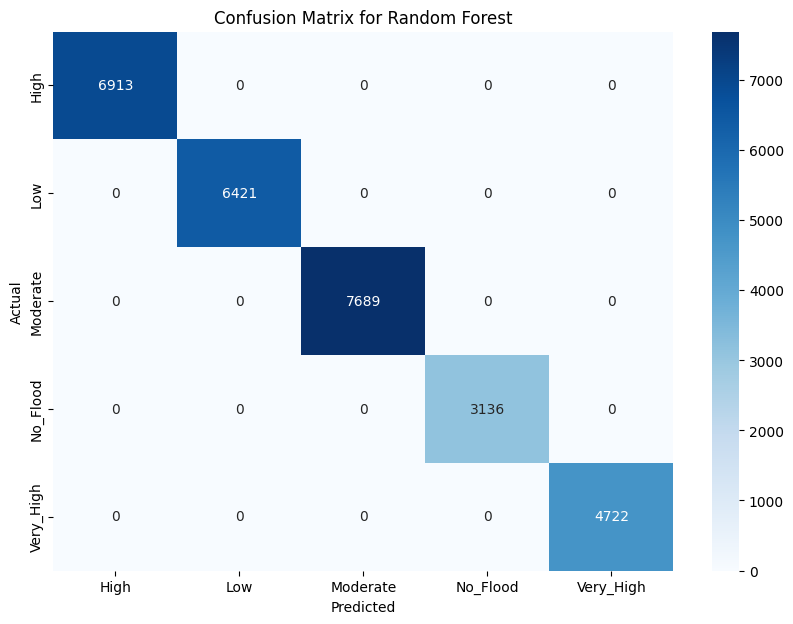

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Predict on the test set
Y_pred_rf = rf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the LinearRegression model
lr = LinearRegression()

# Fit the model
lr.fit(X_train_imputed, Y_train)

# Predict on the test set
Y_pred = lr.predict(X_test_imputed)

# Print the model
print("Linear Regression Model:", lr)

# Print the Mean Squared Error and R^2 Score
print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred))
print("R^2 Score:", r2_score(Y_test, Y_pred))

Linear Regression Model: LinearRegression()
Mean Squared Error: 1.8720118713966911
R^2 Score: -7.256485533169155e-05


##Landslide data


In [2]:
land_pd = pd.read_csv("./dataset/regenerated_landslide_risk_dataset.csv")

In [3]:
land_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Temperature (°C)           5000 non-null   int64 
 1   Humidity (%)               5000 non-null   int64 
 2   Precipitation (mm)         5000 non-null   int64 
 3   Soil Moisture (%)          5000 non-null   int64 
 4   Elevation (m)              5000 non-null   int64 
 5   Landslide Risk Prediction  5000 non-null   object
dtypes: int64(5), object(1)
memory usage: 234.5+ KB


In [5]:
land_pd["Landslide Risk Prediction"].unique()

array(['Low', 'Moderate', 'High', 'Very High'], dtype=object)

In [7]:
land_map = {"Low": 0, "Moderate": 1, "High": 2,"Very High": 3}

In [18]:
reverse_map = {v: k for k, v in land_map.items()}
reverse_map

{0: 'Low', 1: 'Moderate', 2: 'High', 3: 'Very High'}

In [8]:
land_pd["Landslide Risk Prediction"] = land_pd["Landslide Risk Prediction"].map(land_map)

In [10]:
x,y = land_pd.drop(["Landslide Risk Prediction"], axis=1), land_pd["Landslide Risk Prediction"]

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier with chosen parameters
model = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5, random_state=42)
model.fit(x_train, y_train)


RandomForestClassifier(max_depth=20, min_samples_split=5, random_state=42)

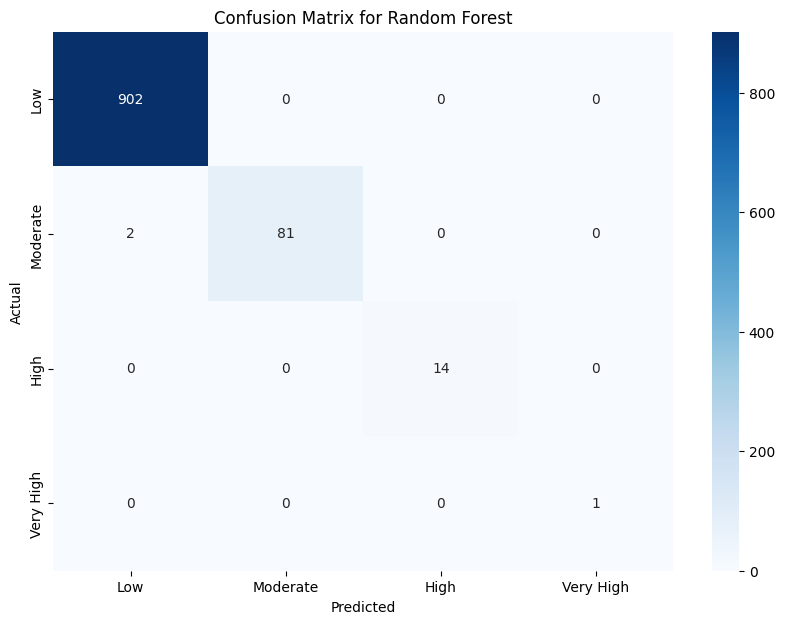

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(x_test)

# Generate the confusion matrix

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=land_map.keys(), yticklabels=land_map.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()


In [15]:
import joblib
joblib.dump(model, 'router/landslide_risk_model.pkl')

['router/landslide_risk_model.pkl']

In [16]:
x.columns

Index(['Temperature (°C)', 'Humidity (%)', 'Precipitation (mm)',
       'Soil Moisture (%)', 'Elevation (m)'],
      dtype='object')